Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [12]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels as sm
from sklearn.model_selection import train_test_split

from sklearn import linear_model, datasets

In [77]:
'''
Combine all three datasets together

First combine Yelp with Foursquares based on Place Name 
Second combine that dataset with stations database
'''

nearby_places_df = pd.read_csv('nearby_places_df.csv')
yelp_nearby_places_df = pd.read_csv('yelp_nearby_places_df.csv')
stations_df = pd.read_csv('stations_df.csv')

#Combine Yelp and nearby_places_df
combined_df = pd.merge(nearby_places_df, yelp_nearby_places_df, left_on='Place', right_on='Place', how='outer') #Combining Yelp with Foursquare based on Place name 
combined_df


bikes_combined = pd.merge(combined_df, stations_df, left_on='Bike Station_x', right_on='name', how='left') #Combining joined Database with Bike Station information based on Bike Station Names

bikes_combined = bikes_combined.drop(columns = ['id','timestamp','extra', 'name'], axis=1) #Dropping columns that are not needed for EDA/Analysis
bikes_combined.rename(columns = {'latitude': 'Bike Station Latitude', 'longitude': 'Bike Station Longitude', 'Bike Station_x': 'Bike Station'}, inplace = True) #Renaming additional columns to ease of analysis

#Saving Database as a CSV

bikes_combined.to_csv('bikes_combined.csv', index = False)

#Display combined Database
bikes_combined 



,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,Review Count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes
0,NaN,% Arabica,NaN,NaN,NaN,NaN,NaN,Cordova & Bute,49.288508,-123.118397,4.2,6.0,No price available,NaN,NaN,NaN,NaN,NaN
1,NaN,% Arabica,NaN,NaN,NaN,NaN,NaN,Pender & Burrard,49.288508,-123.118397,4.2,6.0,No price available,NaN,NaN,NaN,NaN,NaN
2,NaN,% Arabica,NaN,NaN,NaN,NaN,NaN,Rogers Tower,49.288508,-123.118397,4.2,6.0,No price available,NaN,NaN,NaN,NaN,NaN
3,30th & Ontario,1/2 Roll Japanese Grill & Sushi Bar,49.248365,-123.100906,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.243375,-123.104978,9.0,13.0,22.0
4,22nd & Main,1/2 Roll Japanese Grill & Sushi Bar,49.248365,-123.100906,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.250940,-123.101306,2.0,12.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80373,NaN,Ça Marche Creperie,NaN,NaN,NaN,NaN,NaN,David Lam Park,49.274534,-123.131204,4.1,26.0,No price available,NaN,NaN,NaN,NaN,NaN
80374,NaN,Ça Marche Creperie,NaN,NaN,NaN,NaN,NaN,Anderson & 2nd,49.274534,-123.131204,4.1,26.0,No price available,NaN,NaN,NaN,NaN,NaN
80375,NaN,Ça Marche Creperie,NaN,NaN,NaN,NaN,NaN,Granville Island,49.274534,-123.131204,4.1,26.0,No price available,NaN,NaN,NaN,NaN,NaN
80376,Chilco & Beach,İstanbul Döner,49.289408,-123.138229,No rating available,No popularity available,No price available,NaN,NaN,NaN,NaN,NaN,NaN,49.289720,-123.144028,14.0,1.0,15.0


In [92]:
#Create a function that would calculate the distance from a restaurant to the nearest Bike Station: 

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth specified by their latitude and longitude.
    """
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
## Github code to calculate distance between longitude and latitude

# Calculate distance and add as a new column
bikes_combined["Distance"] = haversine(
    bikes_combined["Bike Station Latitude"],
    bikes_combined["Bike Station Longitude"],
    bikes_combined["Place Latitude_x"].astype(float, errors="ignore"),
    bikes_combined["Place Longitude_x"].astype(float, errors="ignore")
)

# Display the updated DataFrame with the new column
bikes_combined.head()

C:\Users\lai29\AppData\Local\Temp\ipykernel_11256\527799037.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_combined["Distance"] = haversine(


,Bike Station,Place,Place Latitude_x,Place Longitude_x,Rating_x,Popularity,Price_x,Bike Station_y,Place Latitude_y,Place Longitude_y,Rating_y,review_count,Price_y,Bike Station Latitude,Bike Station Longitude,free_bikes,empty_slots,total_bikes,price_category,Distance
111,East Blvd & 37th,41 Noodle & Rice Pot House,49.234829,-123.159261,No rating available,No popularity available,No price available,Arbutus & Nanton,49.234800,-123.159250,4.0,49.0,2,49.238105,-123.154966,3.0,16.0,19.0,affordable,479.515483
329,St George & Broadway,AJ's Brooklyn Pizza Joint,49.262989,-123.098175,No rating available,No popularity available,No price available,St George & Broadway,49.262944,-123.098307,4.2,171.0,2,49.262321,-123.093060,2.0,12.0,14.0,affordable,378.529089
1119,8th & Macdonald,Ah Long Sushi,49.264189,-123.166319,No rating available,No popularity available,No price available,8th & Macdonald,49.264184,-123.166260,4.2,10.0,0,49.264928,-123.168068,5.0,17.0,22.0,0,151.191502
1150,Britannia Parking Lot,Al Basha,49.272233,-123.069836,No rating available,No popularity available,No price available,Chestnut & McNicoll,49.272615,-123.148668,4.1,45.0,1,49.275882,-123.071865,5.0,9.0,14.0,cheap,431.626252
1342,Lakewood & Triumph,Aleph Eatery,49.284921,-123.065799,No rating available,No popularity available,No price available,Britannia Parking Lot,49.284929,-123.065795,4.4,91.0,2,49.283968,-123.061615,4.0,12.0,16.0,affordable,321.446905


In [89]:
bikes_combined.shape

(376, 19)

In [ ]:
bikes_combined.dropna(inplace=True) #dropping any null values as that is not needed for analysis. Using averages for this example would overbias the mean. 

In [78]:
bikes_combined = bikes_combined.drop_duplicates(subset=['Place', 'Place Latitude_x'], keep='first') #Dropping duplicates with the same name and coordinates
#EDA: 
print("Unique Bike Stations:", bikes_combined['Bike Station'].nunique())
print("Unique Places:", bikes_combined['Place'].nunique())
print(bikes_combined['Price_x'].value_counts())
print(bikes_combined['Popularity'].value_counts())
print(bikes_combined['Rating_x'].value_counts())
print(bikes_combined.dtypes)

#Cleaning data and saving as new Dataframe: 

bikes_combined.rename(columns= {'Review Count':'review_count', 'Distance (meters)':'Distance'}, inplace=True) #Renaming columns for ease of coding
bikes_combined['Price_y'] = bikes_combined['Price_y'].replace(['$','$$','$$$','$$$$','No price available'],['1','2','3','4','0']) ##Changing the dollar signs into numbers to allow for modeling
bikes_combined['price_category'] = bikes_combined['Price_y'].replace(['1','2','3','4'],['cheap','affordable','moderate','expensive']) #Creating a new catergorical column for classificiation
bikes_combined['Price_y'] = bikes_combined['Price_y'].astype(int) #ensuring that the Price_y column is numbers

In [ ]:
bikes_combined.to_csv('combined_dataset_cleaned.csv', index = False) #Saving the cleaned data as a new Dataframe for modeling

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

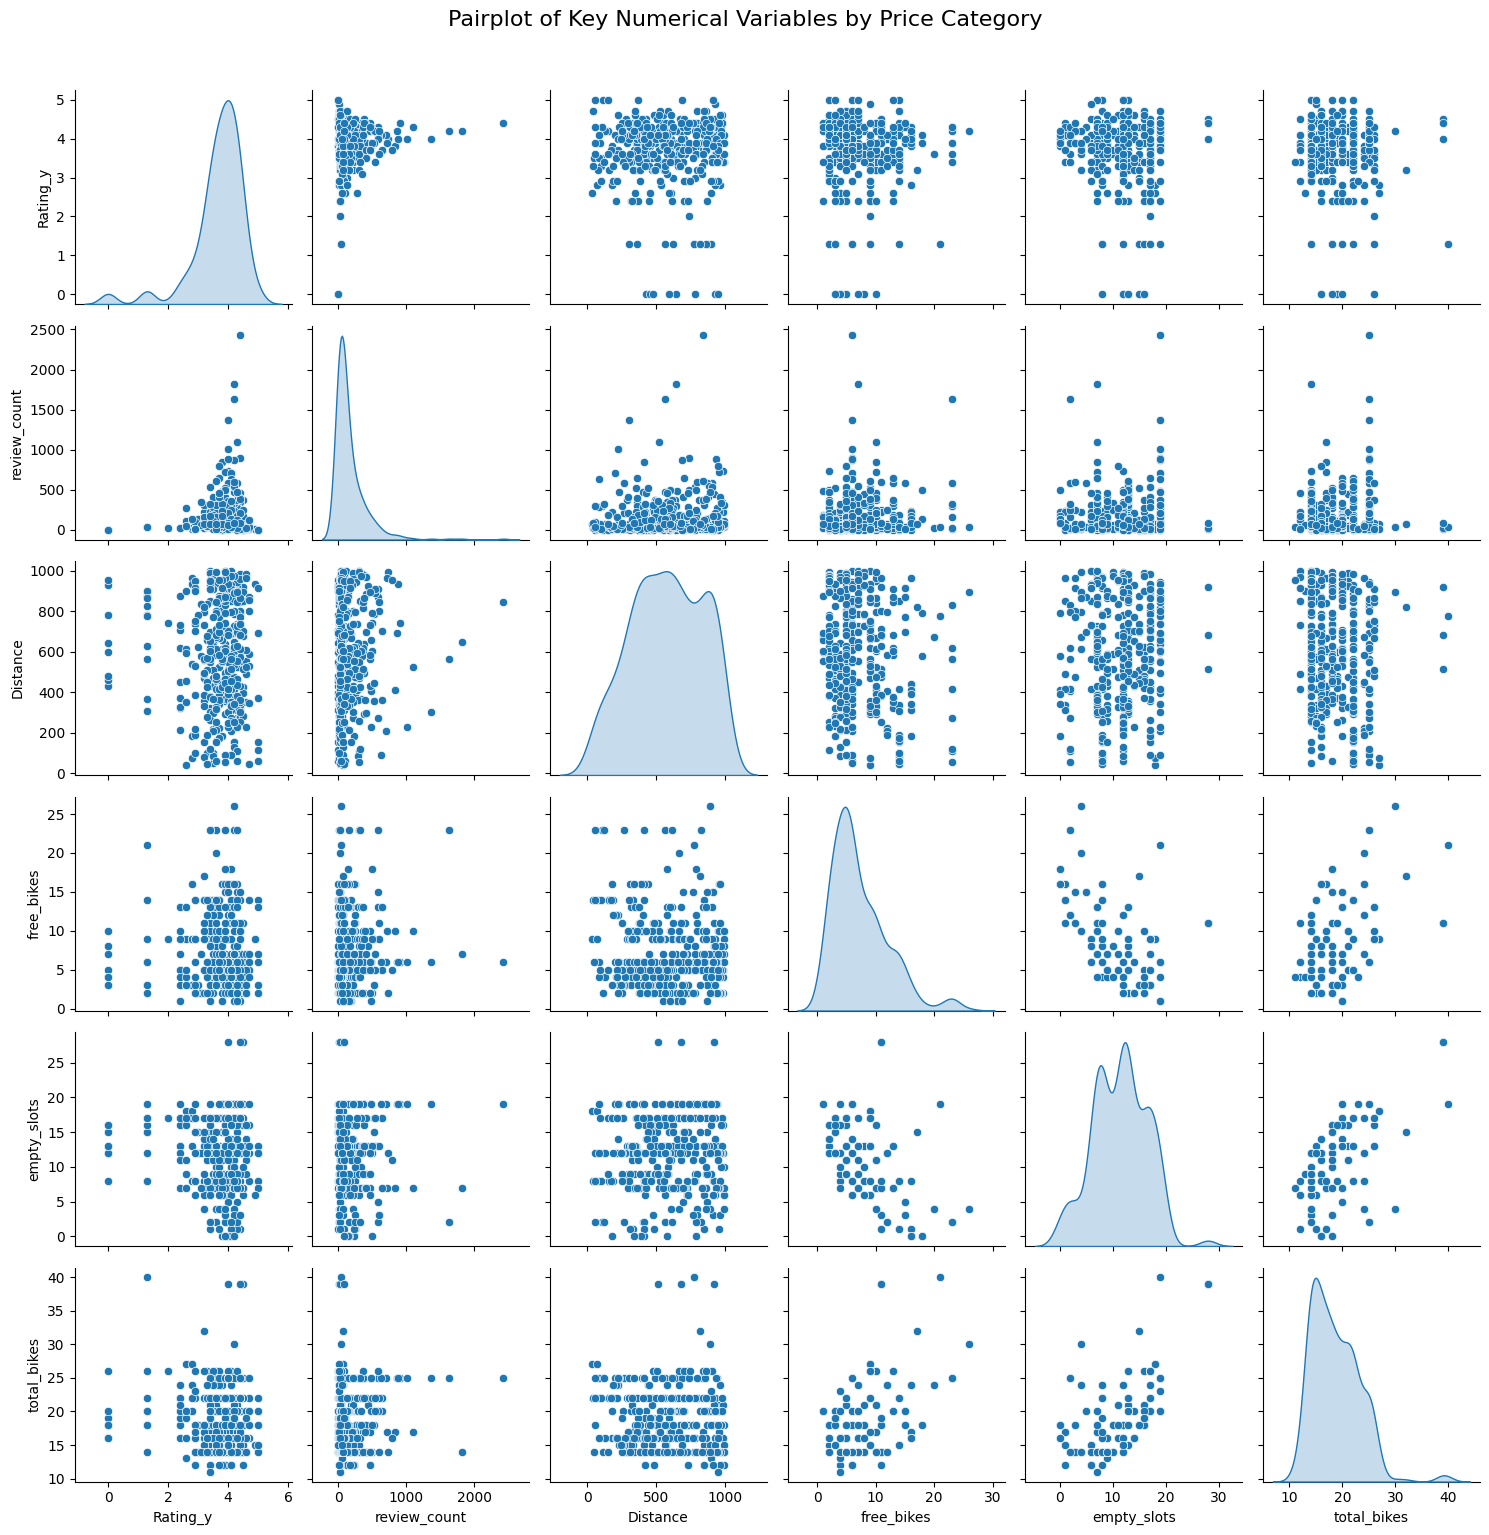

In [96]:
# Key visualization: Pairplot for exploratory relationships between numerical variables
# Helps uncover patterns, correlations, and outliers in numerical data

sns.pairplot(bikes_combined, vars=['Rating_y', 'review_count', 'Distance', 'free_bikes', 'empty_slots', 'total_bikes'],
            diag_kind='kde', markers=["o", "s", "D", "x"])
plt.suptitle('Pairplot of Key Numerical Variables by Price Category', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


The pairplot highlights several key observations about the dataset. Review count is heavily skewed, with most restaurants having fewer than 500 reviews, but a small number present significantly higher counts, indicating the presence of popularity outliers that could skew the data. Ratings and review counts show a positive relationship, which aligns with expectations that higher-rated restaurants tend to attract more reviews. However, there appears to be no visible relationship between distance and any other variables, which can be further examined during regression analysis to quantify the coefficients, though this plot, distance seems relatively unrelated to other metrics.

A few relational trends stand out in the data. The negative correlation between empty slots and free bikes is intuitive: as the number of empty slots at a bike station increases, the number of free bikes decreases. Additionally, the positive relationship between review counts and ratings is evident, with higher ratings generally corresponding to higher review counts, highlighting the link between customer satisfaction and engagement. These observations provide valuable starting points for further analysis and modeling.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.